<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/Entregable_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas 

import seaborn
seaborn.set_context('talk')

In [ ]:
# Acá deberían leer el conjunto de datos que ya tienen.
melb_df = pandas.read_csv('/content/melb_data_complet.csv')
melb_df[:3]

,Suburb,SellerG,CouncilArea,Type,BuildingArea,Rooms,Propertycount,Lattitude,Longtitude,Distance,YearBuilt,Postcode,airbnb_price_median,airbnb_weekly_price_median,airbnb_monthly_price_median
0,Abbotsford,Biggin,Yarra,h,NaN,2,4019.0,-37.7996,144.9984,2.5,NaN,3067.0,100.0,380.0,1440.0
1,Abbotsford,Biggin,Yarra,h,79.0,2,4019.0,-37.8079,144.9934,2.5,1900.0,3067.0,100.0,380.0,1440.0
2,Abbotsford,Biggin,Yarra,h,150.0,3,4019.0,-37.8093,144.9944,2.5,1900.0,3067.0,100.0,380.0,1440.0


In [ ]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12317 entries, 0 to 12316
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Suburb                       12317 non-null  object 
 1   SellerG                      12317 non-null  object 
 2   CouncilArea                  11039 non-null  object 
 3   Type                         12317 non-null  object 
 4   BuildingArea                 5907 non-null   float64
 5   Rooms                        12317 non-null  int64  
 6   Propertycount                12317 non-null  float64
 7   Lattitude                    12317 non-null  float64
 8   Longtitude                   12317 non-null  float64
 9   Distance                     12317 non-null  float64
 10  YearBuilt                    7080 non-null   float64
 11  Postcode                     12317 non-null  float64
 12  airbnb_price_median          12296 non-null  float64
 13  airbnb_weekly_pr

In [ ]:
melb_df.shape

(12448, 15)

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [ ]:
melb_df.columns

Index(['Suburb', 'SellerG', 'CouncilArea', 'Type', 'BuildingArea', 'Rooms',
       'Propertycount', 'Lattitude', 'Longtitude', 'Distance', 'YearBuilt',
       'Postcode', 'airbnb_price_median', 'airbnb_weekly_price_median',
       'airbnb_monthly_price_median'],
      dtype='object')

In [ ]:
melb_df2 = melb_df.drop(columns=['YearBuilt', 'BuildingArea'])
melb_df2.columns

Index(['Suburb', 'SellerG', 'CouncilArea', 'Type', 'Rooms', 'Propertycount',
       'Lattitude', 'Longtitude', 'Distance', 'Postcode',
       'airbnb_price_median', 'airbnb_weekly_price_median',
       'airbnb_monthly_price_median'],
      dtype='object')

Definimos una lista de las columnas que se corresponden a variables categoricas

In [ ]:
columns_to_encode = ['Type', 'SellerG', 'Suburb', 'CouncilArea']

Hacemos OneHot Encoding en las columnas identificadas

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoded_melb_df = pandas.get_dummies(melb_df2, columns=columns_to_encode)

In [ ]:
encoded_melb_df[:5]

,Rooms,Propertycount,Lattitude,Longtitude,Distance,Postcode,airbnb_price_median,airbnb_weekly_price_median,airbnb_monthly_price_median,Type_h,...,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Unavailable,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges
0,2,4019.0,-37.7996,144.9984,2.5,3067.0,100.0,380.0,1440.0,1,...,0,0,0,0,0,0,0,0,1,0
1,2,4019.0,-37.8079,144.9934,2.5,3067.0,100.0,380.0,1440.0,1,...,0,0,0,0,0,0,0,0,1,0
2,3,4019.0,-37.8093,144.9944,2.5,3067.0,100.0,380.0,1440.0,1,...,0,0,0,0,0,0,0,0,1,0
3,3,4019.0,-37.7969,144.9969,2.5,3067.0,100.0,380.0,1440.0,1,...,0,0,0,0,0,0,0,0,1,0
4,4,4019.0,-37.8072,144.9941,2.5,3067.0,100.0,380.0,1440.0,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
print(f'Dimensiones (original): {len(melb_df2.columns)}')
print(f'Dimensiones (despues del encoding): {len(encoded_melb_df.columns)}')

Dimensiones (original): 13
Dimensiones (despues del encoding): 614


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

**1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.**

In [ ]:
encoded_melb_df = encoded_melb_df.join(melb_df[['YearBuilt', 'BuildingArea']])

**2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?**



A continuacion vamos a mostrar graficos de la imputacion para ambas columnas, con los datos escalados y no escalados. 

Cuando se usa un algoritmo en el que se asocia como similar un vector con otro esa similitud suele medirse (aunque no siempre) con la distancia euclidea, como es el caso de KNN. Esto quiere decir que todas las columnas (features) van a tener la misma importancia (si no proveemos un array con los pesos de cada una) por lo cual para la correcta asociacion de vecinos mas cercanos es necesario que todas esten en la misma escala.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = encoded_melb_df.copy(deep=True)

imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice[['YearBuilt','BuildingArea']] = imputer.fit_transform(melb_data_mice[['YearBuilt', 'BuildingArea']])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


Chequeamos que hayan 0 filas para datos nullos en ambas columnas

In [ ]:
print(len(melb_data_mice[melb_data_mice['BuildingArea'].isna()]))
print(len(melb_data_mice[melb_data_mice['YearBuilt'].isna()]))

0
0


**3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.**

#### Sin scaling

###### YearBuilt

(1850.0, 2050.0)

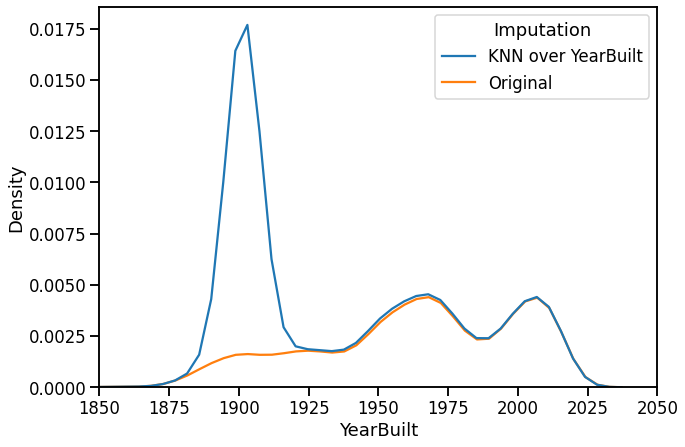

In [ ]:
mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt'
melb_year_build = melb_df.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data = pandas.concat([mice_year_built, melb_year_build], ignore_index=True) #agregué: ignore_index=True para solucionar el error
fig = plt.figure(figsize=(10, 7))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')
plt.xlim([1850, 2050])


###### BuildingArea

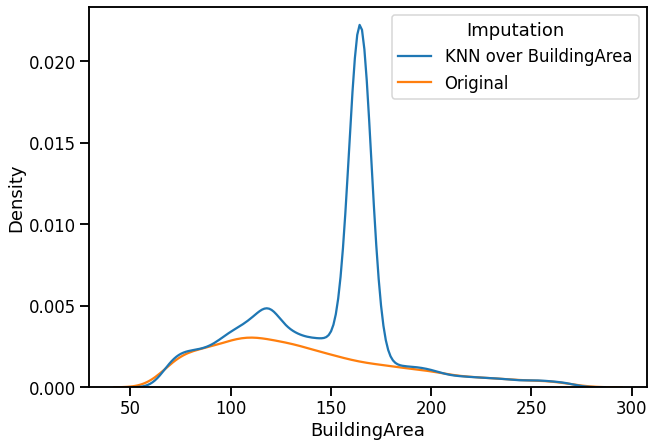

In [ ]:
mice_year_built = melb_data_mice.BuildingArea.to_frame()
mice_year_built['Imputation'] = 'KNN over BuildingArea'
melb_year_build = melb_df.BuildingArea.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data = pandas.concat([mice_year_built, melb_year_build], ignore_index=True) #agregué: ignore_index=True para solucionar el error
fig = plt.figure(figsize=(10, 7))
g = seaborn.kdeplot(data=data, x='BuildingArea', hue='Imputation')

#### Con scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Scale encoded melb_df
scaler = MinMaxScaler()
scaler.fit(encoded_melb_df.to_numpy())
melb_data_scaled = scaler.transform(encoded_melb_df.to_numpy())
melb_data_scaled = pandas.DataFrame(melb_data_scaled, columns=encoded_melb_df.columns)

# Scale a copy of encoded melb_df and impute YearBuilt
melb_data_mice_scaled = melb_data_scaled.copy(deep=True)

imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice_scaled[['YearBuilt', 'BuildingArea']] = imputer.fit_transform(melb_data_mice_scaled[['YearBuilt', 'BuildingArea']])


melb_data_mice_unscaled = scaler.inverse_transform(melb_data_mice_scaled.to_numpy())
melb_data_mice_unscaled = pandas.DataFrame(melb_data_mice_unscaled, columns=encoded_melb_df.columns)


/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
print(len(melb_data_mice_scaled[melb_data_mice['BuildingArea'].isna()]))
print(len(melb_data_mice_scaled[melb_data_mice['YearBuilt'].isna()]))

0
0


##### YearBuilt

1196.0


(1850.0, 2050.0)

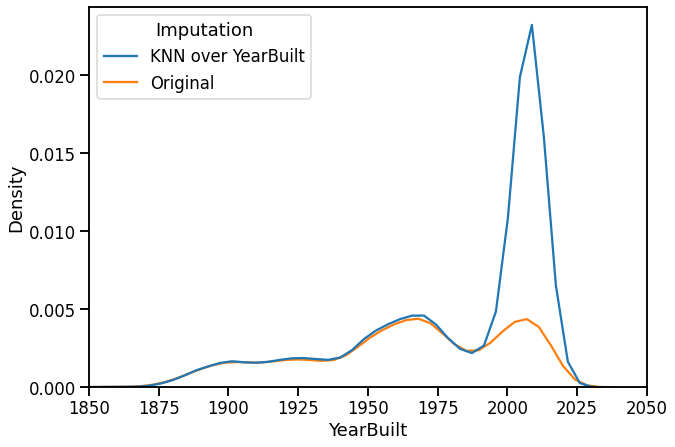

In [ ]:
mice_year_built = melb_data_mice_unscaled.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt'

melb_year_build = encoded_melb_df.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'

data = pandas.concat([mice_year_built, melb_year_build], ignore_index=True) #agregué: ignore_index=True para solucionar el error

fig = plt.figure(figsize=(10, 7))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')
print(encoded_melb_df.YearBuilt.min())
plt.xlim(1850, 2050)

##### BuildingArea

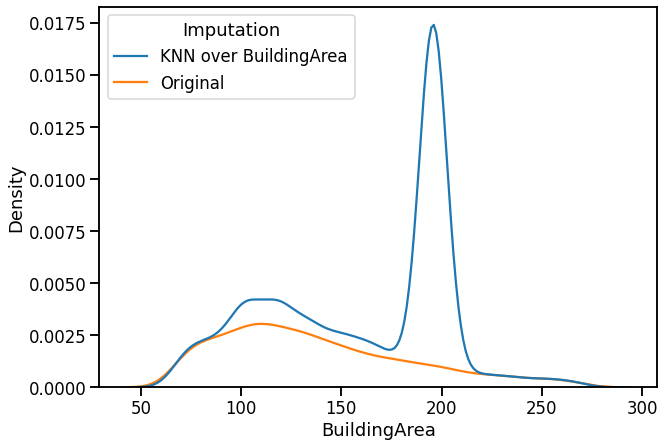

In [ ]:
mice_year_built = melb_data_mice_unscaled.BuildingArea.to_frame()
mice_year_built['Imputation'] = 'KNN over BuildingArea'

melb_year_build = encoded_melb_df.BuildingArea.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'

data = pandas.concat([mice_year_built, melb_year_build], ignore_index=True) #agregué: ignore_index=True para solucionar el error

fig = plt.figure(figsize=(10, 7))
g = seaborn.kdeplot(data=data, x='BuildingArea', hue='Imputation')


## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

**1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?**

El proceso de PCA identifica aquellas direcciones en las que la varianza es mayor. Como la varianza de una variable se mide en su misma escala elevada al cuadrado, si antes de calcular las componentes no se estandarizan todas las variables para que tengan media 0 y desviación estándar 1, aquellas variables cuya escala sea mayor dominarán al resto. De ahí que sea recomendable estandarizar siempre los datos.

Por otro lado, es necesario imputar en las columnas que faltan ya que PCA no puede trabajar con datos no numericos como None y NaN. 


In [ ]:
cols_to_impute = []

for col in melb_data_mice_scaled.columns:
  nan_count = melb_data_mice_scaled[col].isnull().sum()
  if nan_count > 0:
    print(f'Columna {col} tiene {nan_count} NaN')
    cols_to_impute.append(col)

Columna airbnb_price_median tiene 21 NaN
Columna airbnb_weekly_price_median tiene 827 NaN
Columna airbnb_monthly_price_median tiene 1196 NaN


Procedemos a imputar en las columnas arriba listadas

In [ ]:
imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice_scaled[cols_to_impute] = imputer.fit_transform(melb_data_mice_scaled[cols_to_impute])

In [ ]:
from sklearn.decomposition import PCA

n_dim = min(20, melb_data_mice_scaled.shape[0])
pca = PCA(n_dim)
melb_dim_red = pca.fit_transform(melb_data_mice_scaled)

**2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.**

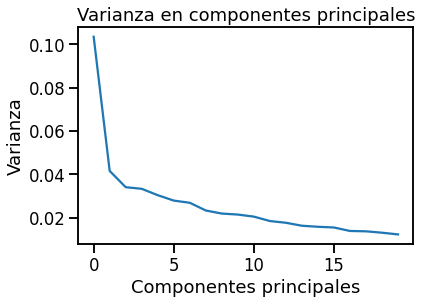

In [ ]:
plt.plot(range(0, n_dim), pca.explained_variance_ratio_)
plt.ylabel('Varianza')
plt.xlabel('Componentes principales')
plt.title('Varianza en componentes principales')
plt.show()


**3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.**

In [ ]:
 pca.explained_variance_ratio_

array([0.1035609 , 0.04157238, 0.03407362, 0.03332154, 0.03038204,
       0.02788615, 0.02687145, 0.02330826, 0.02189091, 0.02142892,
       0.02047628, 0.01844635, 0.01763827, 0.0162702 , 0.01578874,
       0.01546321, 0.0138553 , 0.01369381, 0.01304785, 0.0122617 ])

In [ ]:
pca.singular_values_

array([66.44254485, 42.09696531, 38.11162529, 37.68867874, 35.98792688,
       34.47804419, 33.84495   , 31.52124198, 30.54782239, 30.22376223,
       29.54431459, 28.0416484 , 27.42055909, 26.33569531, 25.94311611,
       25.67427489, 24.30279948, 24.16075375, 23.58402238, 22.86249664])

La gráfica de sedimentación muestra que los valores de la varianza explicada comienzan a formar una línea recta después del tercer componente principal. Por lo tanto, los componentes principales restantes explican una proporción muy pequeña de la variabilidad (cercana a cero) y probablemente carezcan de importancia.

In [ ]:
n_pca_components = 3
melb_pca_to_add = melb_dim_red[:, 0:n_pca_components]

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
melb_extended_pca = numpy.hstack([melb_data_mice_scaled, melb_pca_to_add])

new_pca_cols = [f'pca{i}' for i in range(1, n_pca_components + 1)]
all_columns = [col_name.lower() for col_name in melb_data_mice_scaled.columns.to_list()] + new_pca_cols
melb_extended_pca_df = pandas.DataFrame(data=melb_extended_pca, columns=all_columns)


In [ ]:
melb_extended_pca_df[:10]

,rooms,propertycount,lattitude,longtitude,distance,postcode,airbnb_price_median,airbnb_weekly_price_median,airbnb_monthly_price_median,type_h,...,councilarea_whitehorse,councilarea_whittlesea,councilarea_wyndham,councilarea_yarra,councilarea_yarra ranges,yearbuilt,buildingarea,pca1,pca2,pca3
0,0.25,0.17616,0.494755,0.517651,0.052854,0.068577,0.248509,0.129794,0.088795,1.0,...,0.0,0.0,0.0,1.0,0.0,0.987835,0.634483,-0.287493,-0.082357,-0.128862
1,0.25,0.17616,0.484031,0.513083,0.052854,0.068577,0.248509,0.129794,0.088795,1.0,...,0.0,0.0,0.0,1.0,0.0,0.856448,0.059113,-0.226038,-0.047867,-0.151283
2,0.50,0.17616,0.482223,0.513997,0.052854,0.068577,0.248509,0.129794,0.088795,1.0,...,0.0,0.0,0.0,1.0,0.0,0.856448,0.408867,-0.314810,-0.085200,-0.113642
3,0.50,0.17616,0.498243,0.516281,0.052854,0.068577,0.248509,0.129794,0.088795,1.0,...,0.0,0.0,0.0,1.0,0.0,0.987835,0.634483,-0.338276,-0.097169,-0.103432
4,0.75,0.17616,0.484936,0.513723,0.052854,0.068577,0.248509,0.129794,0.088795,1.0,...,0.0,0.0,0.0,1.0,0.0,0.995134,0.369458,-0.408063,0.633152,-0.237850
5,0.25,0.17616,0.488941,0.514819,0.052854,0.068577,0.248509,0.129794,0.088795,1.0,...,0.0,0.0,0.0,1.0,0.0,0.987835,0.634483,-0.279855,-0.220492,-0.389964
6,0.50,0.17616,0.491137,0.518474,0.052854,0.068577,0.248509,0.129794,0.088795,1.0,...,0.0,0.0,0.0,1.0,0.0,0.868613,0.704433,-0.395524,0.628071,-0.255057
7,0.25,0.17616,0.486486,0.514910,0.052854,0.068577,0.248509,0.129794,0.088795,1.0,...,0.0,0.0,0.0,1.0,0.0,0.844282,0.197044,-0.289696,0.674522,-0.298432
8,0.00,0.17616,0.493204,0.516646,0.052854,0.068577,0.248509,0.129794,0.088795,0.0,...,0.0,0.0,0.0,1.0,0.0,0.987835,0.634483,1.091568,0.017846,-0.244128
9,0.25,0.17616,0.492946,0.518108,0.052854,0.068577,0.248509,0.129794,0.088795,1.0,...,0.0,0.0,0.0,1.0,0.0,0.856448,0.039409,-0.224091,-0.045897,-0.152325


In [ ]:
melb_extended_pca_df.columns

Index(['rooms', 'propertycount', 'lattitude', 'longtitude', 'distance',
       'postcode', 'airbnb_price_median', 'airbnb_weekly_price_median',
       'airbnb_monthly_price_median', 'type_h',
       ...
       'councilarea_whitehorse', 'councilarea_whittlesea',
       'councilarea_wyndham', 'councilarea_yarra', 'councilarea_yarra ranges',
       'yearbuilt', 'buildingarea', 'pca1', 'pca2', 'pca3'],
      dtype='object', length=619)

In [ ]:
melb_extended_pca_df.to_csv('melb_pca_extended.csv')

In [ ]:
# ## Small example
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import OneHotEncoder

# ## If we process our data with the following steps:
# categorical_cols = ['Type', 'Regionname']
# numerical_cols = ['Rooms', 'Distance']
# new_columns = []

# # Step 1: encode categorical columns
# encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# X_cat = encoder.fit_transform(melb_df[categorical_cols])
# for col, col_values in zip(categorical_cols, encoder.categories_):
#   for col_value in col_values:
#     new_columns.append('{}={}'.format(col, col_value))
# print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# # Step 2: Append the numerical columns
# X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
# new_columns.extend(numerical_cols)
# print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# # Step 3: Append some new features, like PCA
# pca = PCA(n_components=2)
# pca_dummy_features = pca.fit_transform(X)
# X_pca = numpy.hstack([X, pca_dummy_features])
# new_columns.extend(['pca1', 'pca2'])

# ## Re-build dataframe
# processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
# processed_melb_df.head()

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
